In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.metrics import accuracy_score
%matplotlib inline
from datetime import datetime
import pickle
import warnings
import ast
import re
warnings.filterwarnings("ignore")

In [2]:
def calculate_ask_vamp(row, k):
    dv = row['qav1m'] / k
    if row['dva'] >= dv:
        return row['ask']
    elif (row['dva']+row['dva1']) >= dv:
        return dv / (row['as']+(dv-row['dva'])/row['ask1'])
    elif (row['dva']+row['dva1']+row['dva2']) >= dv:
        return dv / (row['as']+row['as1']+(dv-row['dva']-row['dva1'])/row['ask2'])
    elif (row['dva']+row['dva1']+row['dva2']+row['dva3']) >= dv:
        return dv / (row['as']+row['as1']+row['as2']+(dv-row['dva']-row['dva1']-row['dva2'])/row['ask3'])
    elif (row['dva']+row['dva1']+row['dva2']+row['dva3']+row['dva4']) >= dv:
        return dv / (row['as']+row['as1']+row['as2']+row['as3']+(dv-row['dva']-row['dva1']-row['dva2']-row['dva3'])/row['ask4'])
    else:
        return (row['dva']+row['dva1']+row['dva2']+row['dva3']+row['dva4']) / (row['as']+row['as1']+row['as2']+row['as3']+row['as4'])

def calculate_bid_vamp(row, k):
    dv = row['qav1m'] / k
    if row['dvb'] >= dv:
        return row['bid']
    elif (row['dvb']+row['dvb1']) >= dv:
        return dv / (row['bs']+(dv-row['dvb'])/row['bid1'])
    elif (row['dvb']+row['dvb1']+row['dvb2']) >= dv:
        return dv / (row['bs']+row['bs1']+(dv-row['dvb']-row['dvb1'])/row['bid2'])
    elif (row['dvb']+row['dvb1']+row['dvb2']+row['dvb3']) >= dv:
        return dv / (row['bs']+row['bs1']+row['bs2']+(dv-row['dvb']-row['dvb1']-row['dvb2'])/row['bid3'])
    elif (row['dvb']+row['dvb1']+row['dvb2']+row['dvb3']+row['dvb4']) >= dv:
        return dv / (row['bs']+row['bs1']+row['bs2']+row['bs3']+(dv-row['dvb']-row['dvb1']-row['dvb2']-row['dvb3'])/row['bid4'])
    else:
        return (row['dvb']+row['dvb1']+row['dvb2']+row['dvb3']+row['dvb4']) / (row['bs']+row['bs1']+row['bs2']+row['bs3']+row['bs4'])

def vamp(df, k):
    return (df.apply(lambda row: calculate_ask_vamp(row, k), axis=1)+df.apply(lambda row: calculate_bid_vamp(row, k), axis=1))/2      


In [3]:
def naive_calculate_ask_vamp(row, dv):
    if row['dva'] >= dv:
        return row['ask']
    elif (row['dva']+row['dva1']) >= dv:
        return dv / (row['as']+(dv-row['dva'])/row['ask1'])
    elif (row['dva']+row['dva1']+row['dva2']) >= dv:
        return dv / (row['as']+row['as1']+(dv-row['dva']-row['dva1'])/row['ask2'])
    elif (row['dva']+row['dva1']+row['dva2']+row['dva3']) >= dv:
        return dv / (row['as']+row['as1']+row['as2']+(dv-row['dva']-row['dva1']-row['dva2'])/row['ask3'])
    elif (row['dva']+row['dva1']+row['dva2']+row['dva3']+row['dva4']) >= dv:
        return dv / (row['as']+row['as1']+row['as2']+row['as3']+(dv-row['dva']-row['dva1']-row['dva2']-row['dva3'])/row['ask4'])
    else:
        return (row['dva']+row['dva1']+row['dva2']+row['dva3']+row['dva4']) / (row['as']+row['as1']+row['as2']+row['as3']+row['as4'])

def naive_calculate_bid_vamp(row, dv):
    if row['dvb'] >= dv:
        return row['bid']
    elif (row['dvb']+row['dvb1']) >= dv:
        return dv / (row['bs']+(dv-row['dvb'])/row['bid1'])
    elif (row['dvb']+row['dvb1']+row['dvb2']) >= dv:
        return dv / (row['bs']+row['bs1']+(dv-row['dvb']-row['dvb1'])/row['bid2'])
    elif (row['dvb']+row['dvb1']+row['dvb2']+row['dvb3']) >= dv:
        return dv / (row['bs']+row['bs1']+row['bs2']+(dv-row['dvb']-row['dvb1']-row['dvb2'])/row['bid3'])
    elif (row['dvb']+row['dvb1']+row['dvb2']+row['dvb3']+row['dvb4']) >= dv:
        return dv / (row['bs']+row['bs1']+row['bs2']+row['bs3']+(dv-row['dvb']-row['dvb1']-row['dvb2']-row['dvb3'])/row['bid4'])
    else:
        return (row['dvb']+row['dvb1']+row['dvb2']+row['dvb3']+row['dvb4']) / (row['bs']+row['bs1']+row['bs2']+row['bs3']+row['bs4'])

def naive_vamp(df, dv):
    return (df.apply(lambda row: naive_calculate_ask_vamp(row, dv), axis=1)+df.apply(lambda row: naive_calculate_bid_vamp(row, dv), axis=1))/2      


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy import stats

def plot_regression_binned_data(X, Y, num_bins=20, min_samples=10):
    # Discretize X into num_bins
    bin_edges = np.linspace(X.min(), X.max(), num_bins + 1)
    bin_labels = np.digitize(X, bin_edges)

    # Create a DataFrame to store X, Y, and bin labels
    data = pd.DataFrame({'X': X, 'Y': Y, 'Bin': bin_labels})

    # Initialize an empty DataFrame to store bin statistics
    bin_statistics = pd.DataFrame(columns=['Bin', 'Count_X', 'Mean_X', 'Mean_Y'])

    # Loop through each bin and calculate statistics
    for bin_num in range(1, num_bins + 1):
        bin_data = data[data['Bin'] == bin_num]
        count_x = len(bin_data)

        if count_x >= min_samples:
            mean_x = bin_data['X'].mean()
            mean_y = bin_data['Y'].mean()

            # Store bin statistics in the DataFrame
            bin_statistics = bin_statistics.append({
                'Bin': bin_num,
                'Count_X': count_x,
                'Mean_X': mean_x,
                'Mean_Y': mean_y
            }, ignore_index=True)
            
    X = pd.to_numeric(bin_statistics['Mean_X'], errors='coerce')
    Y = pd.to_numeric(bin_statistics['Mean_Y'], errors='coerce')
    
    
    correlation_coefficient, p_value = stats.pearsonr(X, Y)
    plt.scatter(X, Y, label='Data Points')
    slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)

    # Add the regression line to the plot
    regression_line = slope * X + intercept
    plt.plot(X, regression_line, color='red', label='Linear Regression Line')

    # Display correlation, p-value, and regression equation on the plot
    plt.annotate(f'Correlation: {correlation_coefficient:2f}', (0.01, 0.95), xycoords='axes fraction')
    plt.annotate(f'P-value: {p_value}', (0.01, 0.9), xycoords='axes fraction')
    plt.annotate(f'Y = {slope:.4f}*X + {intercept:4f}', (0.01, 0.85), xycoords='axes fraction')

    # Add labels and legend
    plt.xlabel('VAMP-Mid')
    # plt.legend()

    # Show the plot

In [5]:
def ret_vs_vamp_mid(coin, fixed_vamp_amount=20000, n1=60, n3=20):
    df2 = pd.read_excel(coin+'.xlsx', index_col=0) # data collected lively from record_trade_BTC.py in Hummingbot
    column_names = ['time']+['ask', 'as', 'bid', 'bs'] + ['ask1', 'as1', 'bid1', 'bs1'] + ['ask2', 'as2', 'bid2', 'bs2'] + ['ask3', 'as3', 'bid3', 'bs3'] + ['ask4', 'as4', 'bid4', 'bs4']
    df2 = df2[column_names]
    df2 = df2.dropna()
    df2['mid'] = (df2['ask']+df2['bid'])/2
    df2['dva'] = df2['ask'] * df2['as']
    df2['dvb'] = df2['bid'] * df2['bs']
    for i in ['1', '2', '3', '4']:
        df2['dva'+i] = df2['ask'+i] * df2['as'+i]
        df2['dvb'+i] = df2['bid'+i] * df2['bs'+i]

    DF = pd.read_csv('candles_binance_'+coin+'-USDT_1s.csv')
    df = DF.iloc[:, :7]
    df['time'] = df['timestamp'] // 1000
    df = df[(df['time'] >= df2['time'].iloc[0]) &(df['time'] <= df2['time'].iloc[-1])]
    df2['qav'] = df['quote_asset_volume'].to_list()
    df2['qav1m'] = df2['qav'].rolling(60).sum()
    df2['ret_1s'] = (df2['mid'] - df2['mid'].shift()) / df2['mid'].shift()
    df2['ret_3s'] = (df2['mid'] - df2['mid'].shift(3)) / df2['mid'].shift(3)
    df2 = df2.dropna()

    plt.figure()
    plot_regression_binned_data(naive_vamp(df2, fixed_vamp_amount)-df2['mid'], df2['ret_1s'])  
    plt.title('1s Return vs NaiveVAMP($'+str(fixed_vamp_amount)+')-Mid')

    plt.figure()
    plot_regression_binned_data(vamp(df2, n1)-df2['mid'], df2['ret_1s'])
    plt.title('1s Return vs VAMP-Mid')

    plt.figure()
    plot_regression_binned_data(vamp(df2, n3)-df2['mid'], df2['ret_3s'])   
    plt.title('3s Return vs VAMP-Mid')

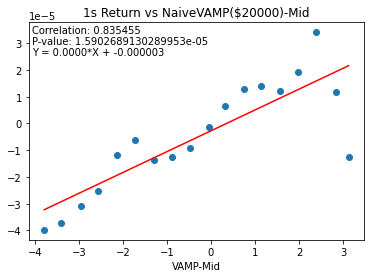

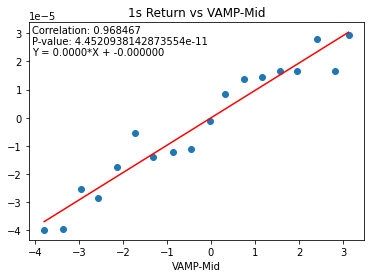

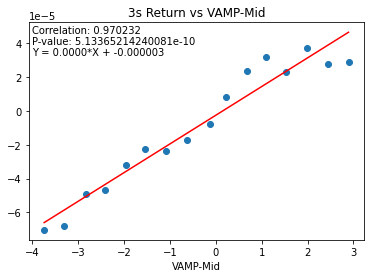

In [6]:
ret_vs_vamp_mid('BTC', 20000, 60, 20)

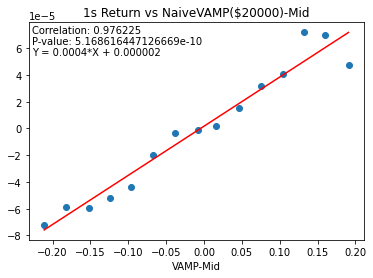

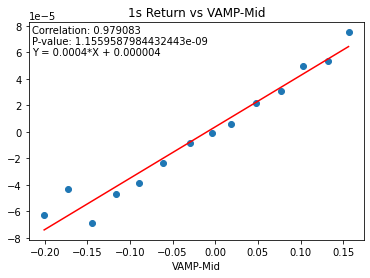

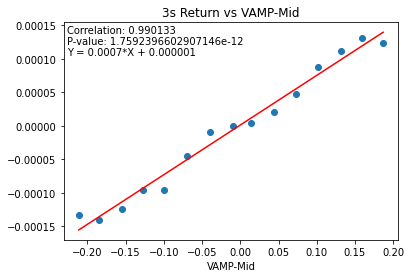

In [7]:
ret_vs_vamp_mid('ETH', 20000, 60, 20)

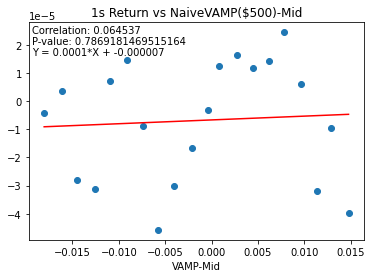

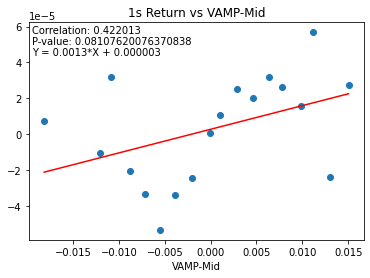

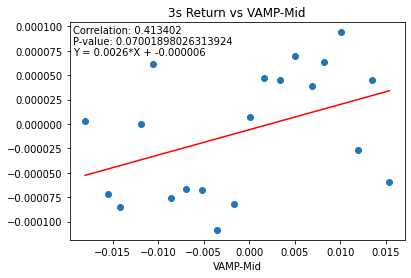

In [129]:
ret_vs_vamp_mid('CYBER', 500, 300, 300/3)

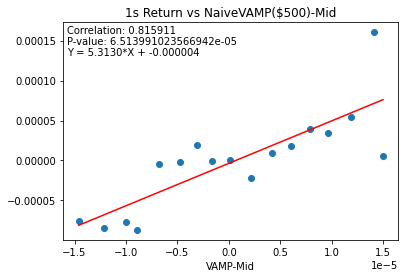

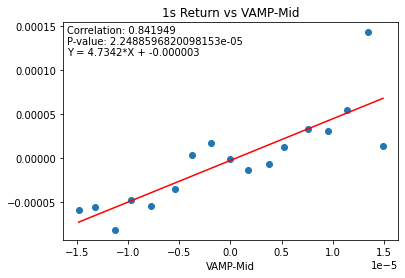

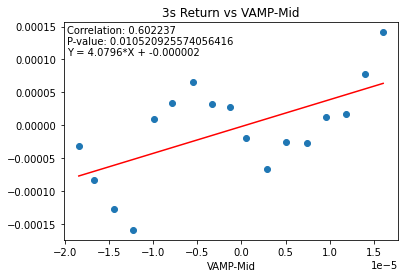

In [132]:
ret_vs_vamp_mid('DOGE', 500, 300, 300/3)